In [1]:



####################################
##
##  Step 1: Connect to the server
##          Send a query
##          Collect and clean the 
##          results
####################################
# MyPath="/Users/Max/Documents/Text mining /Raw_text_speeches_Coded_President_Parties/"

## Now - ALWAYS takes the time to make sure that you can access files
## In other words - TEST you Code!

# Biden_files=os.listdir(MyPath+"/Biden")
# # print(Biden_files)
# Wash_files=os.listdir(MyPath+"/Washington")
# # print(Wash_files)
# MyCompleteFileNames=[]
# MyLabels=[]


# ##_-----------------------------------------------------------
# for folderName in ['Republican', 'Whig', 'Democrat', 'Democratic-Republican', 'Federalist']:
#     ## Get the files 
#     filenames=os.listdir(MyPath + folderName)
#     #print(filenames)  
    
    
#     for eachfile in filenames:
# #         print(eachfile)
#         ## The "str" assures that everything is a string
#         if eachfile != ".ipynb_checkpoints":
#             fullpath=MyPath + str(folderName) + "/" + str(eachfile)
#             # C:/Users/profa/Documents/Python Scripts/TextMining/Week2_3/POS/P1.txt
#     #         print(fullpath)
#             MyCompleteFileNames.append(fullpath)
#             MyLabels.append(folderName)
        
# print("THe labels are:\n")
# print(MyLabels)     

# print("THe complete list of file paths is:\n")
# print(MyCompleteFileNames)     

########################### Next, we can use
## The proper CountVecotorizer and process the text data WITH the labels...   

# ## Now - let's use fit.transform to transform the list of files                                 
# MyTextData1 = My_FN_CV.fit_transform(MyCompleteFileNames)
# ## MyTextData1 is a DTM
# # print(type(MyTextData1))
# ## Get the column names
# MyCol_Names=My_FN_CV.get_feature_names_out()
# ## Be careful - if you print all the col names there may be 100s or 1000s :)

# ## Create the dataframe...
# parties_df = pd.DataFrame(MyTextData1.toarray(), columns=MyCol_Names)
# # print(MyDF_Pos_Neg.head())

# # print(type(MyLabels))
# ## It is a list. 
# ## Let's 
# parties_df['LABELS_'] = MyLabels
## Check it now
# print(FinalDF.head())




######### NOTICE that the data frame has numbers as columns.
## This is not good unless you are specifically looking for numeric values

## Remove all columns with numbers
# # print("The first DF is: \n", FinalDF.head())
# ####### Clean-up ------------>
# RemoveWords=["href", "class", "div", "block", "nav", "pagination", 
#              "space", "https", "http", "template", "squarespace", "id", "jpg", "image",
#              "header", "function", "folder", 'drupal',"transcript","applause"]


# for nextcol in parties_df.columns:
#     if(re.search(r'[^A-Za-z]+', nextcol)):
# #         print(nextcol)
#         parties_df=parties_df.drop([nextcol], axis=1)
# #    ## The following will remove any column with name
# #    ## of 3 or smaller - like "it" or "of" or "pre".
# #    ##print(len(nextcol))  ## check it first
# #    ## NOTE: You can also use this code to CONTROL
# #    ## the words in the columns. For example - you can
# #    ## have only words between lengths 5 and 9. 
# #    ## In this case, we remove columns with words <= 3.

#     elif(len(str(nextcol))<6):
# #                 print(nextcol)
#         parties_df=parties_df.drop([nextcol], axis=1)
#     elif(len(str(nextcol))>15):
# #                 print(nextcol)
#         parties_df=parties_df.drop([nextcol], axis=1)
#     elif(nextcol in RemoveWords):
# #                 print(nextcol)
#         parties_df=parties_df.drop([nextcol], axis=1)
#     elif(len(str(nextcol))<=3):
#         print(nextcol)
#         parties_df=parties_df.drop([nextcol], axis=1)
# print(parties_df)        
    

        



#from sklearn.metrics import silhouette_samples, silhouette_score

## Using MyDTM_DF which is not labeled

# =============================================================================
#     KMean= KMeans(n_clusters=3)
#     KMean.fit(MyDTM_DF)
#     label=KMean.predict(MyDTM_DF)
#     print(label)
#     
#     #sns.scatterplot(MyDTM_DF[0],MyDTM_DF[1], hue=label)
#     print("Silhouette Score for k=3\n",silhouette_score(MyDTM_DF, label))
#       #
# =============================================================================



##############################
## Check These files now on your computer...
#############################################
## NewClouds.pdf
## TopicsVis.pdf
## InTheNews.html
## MyTree.pdf
## Labeled_News_Data_from_API.csv


# This Python Code show MANY examples of clustering with different data types.

##### CLUSTERING -----------------------Gates
## Note to Ami: ClusteringRecordandTextData.py --
# ...\Python Scripts\TextMining\Week4_7
########################################
##
## Clustering Record and Text Data
##
####################################################
## Gates
####################################################


import nltk
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import re   ## for regular expressions
from mpl_toolkits.mplot3d import Axes3D
#from nltk.stem.porter import PorterStemmer

####################################################
##
##  Clustering Text Data from a Corpus 
##
####################################################
## My data and code is here - YOURS IS DIFFERENT
## DATA LINK
# https://drive.google.com/drive/folders/1VSofcdX6g86hjnofMDQJwYVveT544Oy4?usp=sharing
path="/Users/Max/Documents/Text mining /Cleaned_speech_Data/"

## Get the text data first
print("calling os...")
FileNameList=os.listdir(path)
## check the TYPE
print(type(FileNameList))
print(FileNameList)

##-----------
## I need an empty list to start with to build a list of complete paths to files
## Notice that I defined path above. I also need a list of file names.
ListOfCompleteFilePaths=[]
ListOfJustFileNames=[]
# for folderName in ['Republican', 'Whig', 'Democrat', 'Democratic-Republican', 'Federalist']:
#     ## Get the files 
#     filenames=os.listdir(path + folderName)
    #print(filenames)  
    
    
for eachfile in FileNameList:
#         print(eachfile)
        ## The "str" assures that everything is a string
    if eachfile.endswith(".txt"):
        if eachfile != ".ipynb_checkpoints.txt":
            if eachfile != ".DS_Store.txt":
                fullpath=path + str(eachfile)
                    # C:/Users/profa/Documents/Python Scripts/TextMining/Week2_3/POS/P1.txt
            #         print(fullpath)
                ListOfCompleteFilePaths.append(fullpath)
                ListOfJustFileNames.append(eachfile)

print("full list...")
print(ListOfCompleteFilePaths)
print(ListOfJustFileNames)






calling os...
<class 'list'>
['march-3-1817-veto-message-internal-improvements-bill.txt.txt', 'december-6-1932-fourth-state-union-address.txt.txt', 'march-6-1991-address-joint-session-congress-end-gulf-war.txt.txt', 'december-8-1914-second-annual-message.txt.txt', 'april-23-2020-task-force-briefing-coronavirus-pandemic.txt.txt', 'october-22-1962-address-buildup-arms-cuba.txt.txt', 'december-3-1929-first-state-union-address.txt.txt', 'april-28-1965-statement-sending-troops-dominican-republic.txt.txt', 'june-15-2010-speech-bp-oil-spill.txt.txt', 'september-9-2009-address-congress-health-care.txt.txt', 'august-6-1965-remarks-signing-voting-rights-act.txt.txt', 'july-1-1968-remarks-signing-nuclear-nonproliferation-treaty.txt.txt', 'february-9-2010-news-conference-congressional-gridlock.txt.txt', 'december-3-1900-fourth-annual-message.txt.txt', 'december-7-1975-address-university-hawaii.txt.txt', 'may-2-1865-establishing-rewards-arrest-certain-confederate.txt.txt', 'january-25-1994-state-un

In [2]:
## Instantiate three Vectorizers.....
## NOrmal CV
MyVectCount=CountVectorizer(input='filename',
                        stop_words='english',
                        max_features=100
                        )
## Tf-idf vectorizer
MyVectTFIdf=TfidfVectorizer(input='filename',
                        stop_words='english',
                        max_features=100
                        )



## NOw I can vectorize using my list of complete paths to my files
DTM_Count=MyVectCount.fit_transform(ListOfCompleteFilePaths)
DTM_TF=MyVectTFIdf.fit_transform(ListOfCompleteFilePaths)

#####################
## Get the complete vocab - the column names
## !!!!!!!!! FOr TF and CV - but NOT for stemmed...!!!
##################
ColumnNames=MyVectCount.get_feature_names_out()
print("The vocab is: ", ColumnNames, "\n\n")
# ColNamesStem=MyCV_Stem.get_feature_names()
# print("The stemmed vocab is\n", ColNamesStem)

## Use pandas to create data frames
DF_Count=pd.DataFrame(DTM_Count.toarray(),columns=ColumnNames)
DF_TF=pd.DataFrame(DTM_TF.toarray(),columns=ColumnNames)
# DF_stem=pd.DataFrame(DTM_stem.toarray(),columns=ColNamesStem)
print(DF_Count)
print(DF_TF.head())
# print(DF_stem)

############ --------------->
## OK - now we have vectorized the data - and removed punct, numbers, etc.
## From here, we can update the names of the rows without adding labels 
## to the data.
## We CANNOT have labels in the data because:
## 1) Labels are not numeric and (2) Labels are NOT data - they are labels.
#############



The vocab is:  ['act' 'action' 'administration' 'america' 'american' 'americans'
 'applause' 'believe' 'best' 'better' 'business' 'citizens' 'come'
 'congress' 'constitution' 'countries' 'country' 'day' 'department' 'don'
 'duty' 'far' 'federal' 'force' 'foreign' 'free' 'freedom' 'future'
 'general' 'going' 'good' 'government' 'great' 'help' 'history' 'hope'
 'important' 'increase' 'interests' 'just' 'know' 'law' 'laws'
 'legislation' 'let' 'life' 'like' 'long' 'make' 'man' 'means' 'men'
 'military' 'mr' 'nation' 'national' 'nations' 'necessary' 'need' 'new'
 'order' 'peace' 'people' 'place' 'policy' 'power' 'present' 'progress'
 'public' 'purpose' 'question' 'right' 'rights' 'sa' 'say' 'secretary'
 'security' 'service' 'shall' 'state' 'states' 'subject' 'support' 'thank'
 'think' 'time' 'today' 'trade' 'treaty' 'union' 'united' 'use' 've'
 'want' 'war' 'way' 'work' 'world' 'year' 'years'] 


      act  action  administration  america  american  americans  applause  \
0       2       0

In [3]:

## Now update the row names
MyDict={}
for i in range(0, len(ListOfJustFileNames)):
    MyDict[i] = ListOfJustFileNames[i]

print("MY DICT:", MyDict)
        
DF_Count=DF_Count.rename(MyDict, axis="index")
print(DF_Count)

DF_TF=DF_TF.rename(MyDict, axis="index")
print(DF_TF)
## That's pretty!

MY DICT: {0: 'march-3-1817-veto-message-internal-improvements-bill.txt.txt', 1: 'december-6-1932-fourth-state-union-address.txt.txt', 2: 'march-6-1991-address-joint-session-congress-end-gulf-war.txt.txt', 3: 'december-8-1914-second-annual-message.txt.txt', 4: 'april-23-2020-task-force-briefing-coronavirus-pandemic.txt.txt', 5: 'october-22-1962-address-buildup-arms-cuba.txt.txt', 6: 'december-3-1929-first-state-union-address.txt.txt', 7: 'april-28-1965-statement-sending-troops-dominican-republic.txt.txt', 8: 'june-15-2010-speech-bp-oil-spill.txt.txt', 9: 'september-9-2009-address-congress-health-care.txt.txt', 10: 'august-6-1965-remarks-signing-voting-rights-act.txt.txt', 11: 'july-1-1968-remarks-signing-nuclear-nonproliferation-treaty.txt.txt', 12: 'february-9-2010-news-conference-congressional-gridlock.txt.txt', 13: 'december-3-1900-fourth-annual-message.txt.txt', 14: 'december-7-1975-address-university-hawaii.txt.txt', 15: 'may-2-1865-establishing-rewards-arrest-certain-confederate.t

In [4]:
kmeans_object_Count = sklearn.cluster.KMeans(n_clusters=5)
# print(kmeans_object_Count)
kmeans_object_Count.fit(DF_Count)
# # # Get cluster assignment labels


KMeans(n_clusters=5)

In [5]:
labels = kmeans_object_Count.labels_
prediction_kmeans = kmeans_object_Count.predict(DF_Count)
# print(labels)DF_Count_count
# print(prediction_kmeans)
# # Format results as a DataFrame
Myresults = pd.DataFrame([DF_Count.index,labels]).T
print(Myresults)

                                                      0  1
0     march-3-1817-veto-message-internal-improvement...  0
1     december-6-1932-fourth-state-union-address.txt...  0
2     march-6-1991-address-joint-session-congress-en...  4
3         december-8-1914-second-annual-message.txt.txt  4
4     april-23-2020-task-force-briefing-coronavirus-...  3
...                                                 ... ..
1029           february-2-1967-press-conference.txt.txt  0
1030      october-22-1952-rear-platform-remarks.txt.txt  0
1031  january-8-2002-remarks-no-child-left-behind-bi...  0
1032  december-6-1832-veto-message-internal-improvem...  0
1033    january-20-2001-first-inaugural-address.txt.txt  0

[1034 rows x 2 columns]


In [12]:
DF_Count.columns

Index(['act', 'action', 'administration', 'america', 'american', 'americans',
       'applause', 'believe', 'best', 'better', 'business', 'citizens', 'come',
       'congress', 'constitution', 'countries', 'country', 'day', 'department',
       'don', 'duty', 'far', 'federal', 'force', 'foreign', 'free', 'freedom',
       'future', 'general', 'going', 'good', 'government', 'great', 'help',
       'history', 'hope', 'important', 'increase', 'interests', 'just', 'know',
       'law', 'laws', 'legislation', 'let', 'life', 'like', 'long', 'make',
       'man', 'means', 'men', 'military', 'mr', 'nation', 'national',
       'nations', 'necessary', 'need', 'new', 'order', 'peace', 'people',
       'place', 'policy', 'power', 'present', 'progress', 'public', 'purpose',
       'question', 'right', 'rights', 'sa', 'say', 'secretary', 'security',
       'service', 'shall', 'state', 'states', 'subject', 'support', 'thank',
       'think', 'time', 'today', 'trade', 'treaty', 'union', 'united', 'use

In [28]:
DF_Count.columns[57]

'necessary'

Index(['act', 'action', 'administration', 'america', 'american', 'americans',
       'applause', 'believe', 'best', 'better', 'business', 'citizens', 'come',
       'congress', 'constitution', 'countries', 'country', 'day', 'department',
       'don', 'duty', 'far', 'federal', 'force', 'foreign', 'free', 'freedom',
       'future', 'general', 'going', 'good', 'government', 'great', 'help',
       'history', 'hope', 'important', 'increase', 'interests', 'just', 'know',
       'law', 'laws', 'legislation', 'let', 'life', 'like', 'long', 'make',
       'man', 'means', 'men', 'military', 'mr', 'nation', 'national',
       'nations', 'necessary', 'need', 'new', 'order', 'peace', 'people',
       'place', 'policy', 'power', 'present', 'progress', 'public', 'purpose',
       'question', 'right', 'rights', 'sa', 'say', 'secretary', 'security',
       'service', 'shall', 'state', 'states', 'subject', 'support', 'thank',
       'think', 'time', 'today', 'trade', 'treaty', 'union', 'united', 'use

/var/folders/bt/4nsch71j6zqccfsyjsz8d55m0000gp/T/ipykernel_6871/2225426312.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax1 = Axes3D(fig1, rect=[0, 0, .90, 1], elev=48, azim=134)


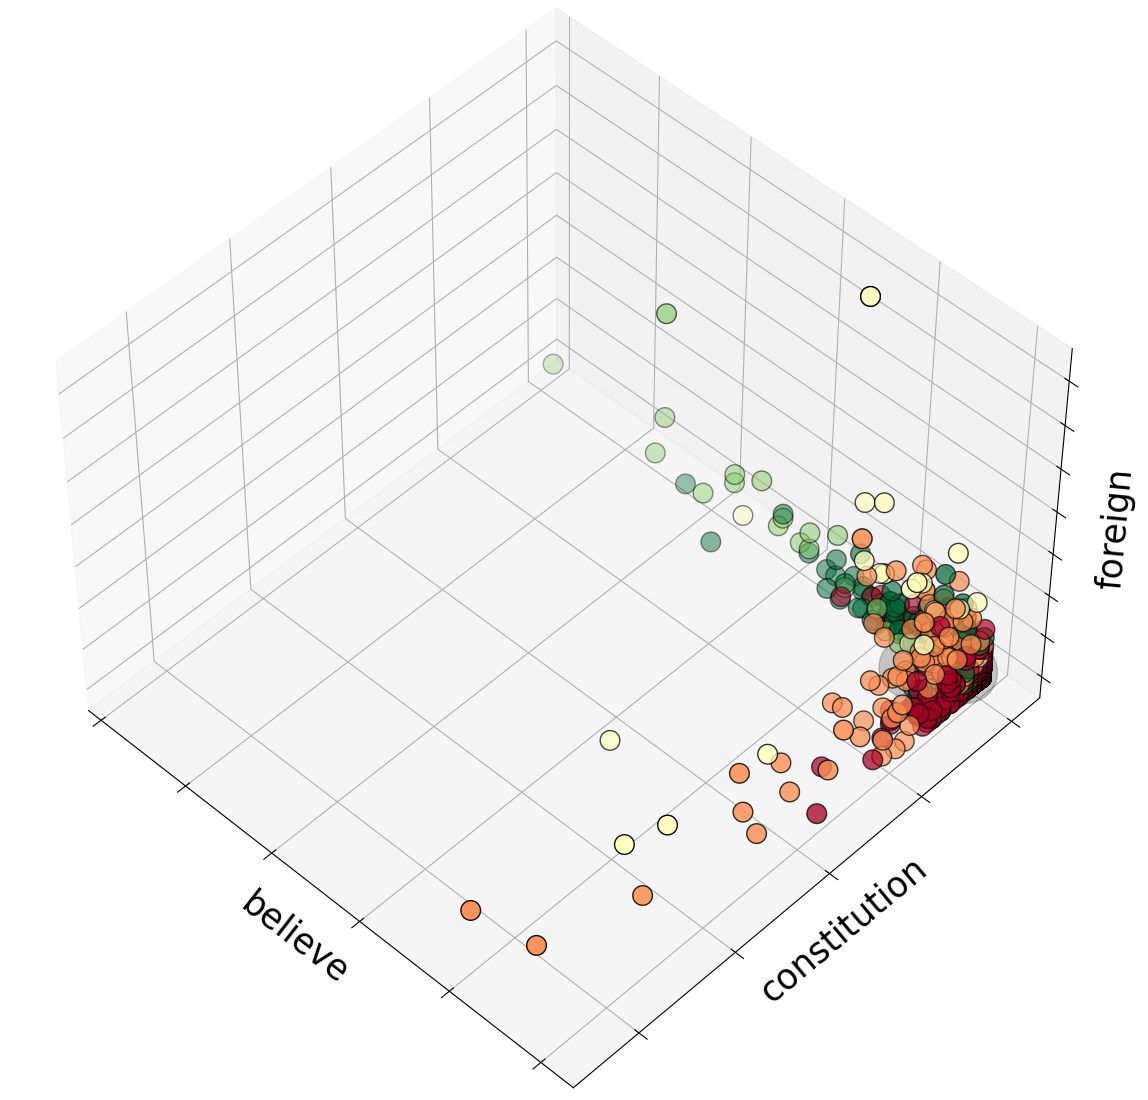

In [24]:
x=DF_Count["believe"]  ## col 1  starting from 0
y=DF_Count["constitution"]    ## col 14  starting from 0
z=DF_Count["foreign"]  ## col 2  starting from 0
colnames=DF_Count.columns
print(colnames)
#print(x,y,z)
fig1 = plt.figure(figsize=(12, 12))
ax1 = Axes3D(fig1, rect=[0, 0, .90, 1], elev=48, azim=134)

ax1.scatter(x,y,z, cmap="RdYlGn", edgecolor='k', s=200,c=prediction_kmeans)
ax1.w_xaxis.set_ticklabels([])
ax1.w_yaxis.set_ticklabels([])
ax1.w_zaxis.set_ticklabels([])

ax1.set_xlabel('believe', fontsize=25)
ax1.set_ylabel('constitution', fontsize=25)
ax1.set_zlabel('foreign', fontsize=25)
#plt.show()
        
centers = kmeans_object_Count.cluster_centers_
print(centers)
#print(centers)
C1=centers[0,(7,14,24)]
print(C1)
C2=centers[1,(7,14,24)]
print(C2)
xs=C1[0],C2[0]
print(xs)
ys=C1[1],C2[1]
zs=C1[2],C2[2]


ax1.scatter(xs,ys,zs, c='black', s=2000, alpha=0.2)
plt.show()

Index(['act', 'action', 'administration', 'america', 'american', 'americans',
       'applause', 'believe', 'best', 'better', 'business', 'citizens', 'come',
       'congress', 'constitution', 'countries', 'country', 'day', 'department',
       'don', 'duty', 'far', 'federal', 'force', 'foreign', 'free', 'freedom',
       'future', 'general', 'going', 'good', 'government', 'great', 'help',
       'history', 'hope', 'important', 'increase', 'interests', 'just', 'know',
       'law', 'laws', 'legislation', 'let', 'life', 'like', 'long', 'make',
       'man', 'means', 'men', 'military', 'mr', 'nation', 'national',
       'nations', 'necessary', 'need', 'new', 'order', 'peace', 'people',
       'place', 'policy', 'power', 'present', 'progress', 'public', 'purpose',
       'question', 'right', 'rights', 'sa', 'say', 'secretary', 'security',
       'service', 'shall', 'state', 'states', 'subject', 'support', 'thank',
       'think', 'time', 'today', 'trade', 'treaty', 'union', 'united', 'use

/var/folders/bt/4nsch71j6zqccfsyjsz8d55m0000gp/T/ipykernel_6871/3222811145.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax1 = Axes3D(fig1, rect=[0, 0, .90, 1], elev=48, azim=134)


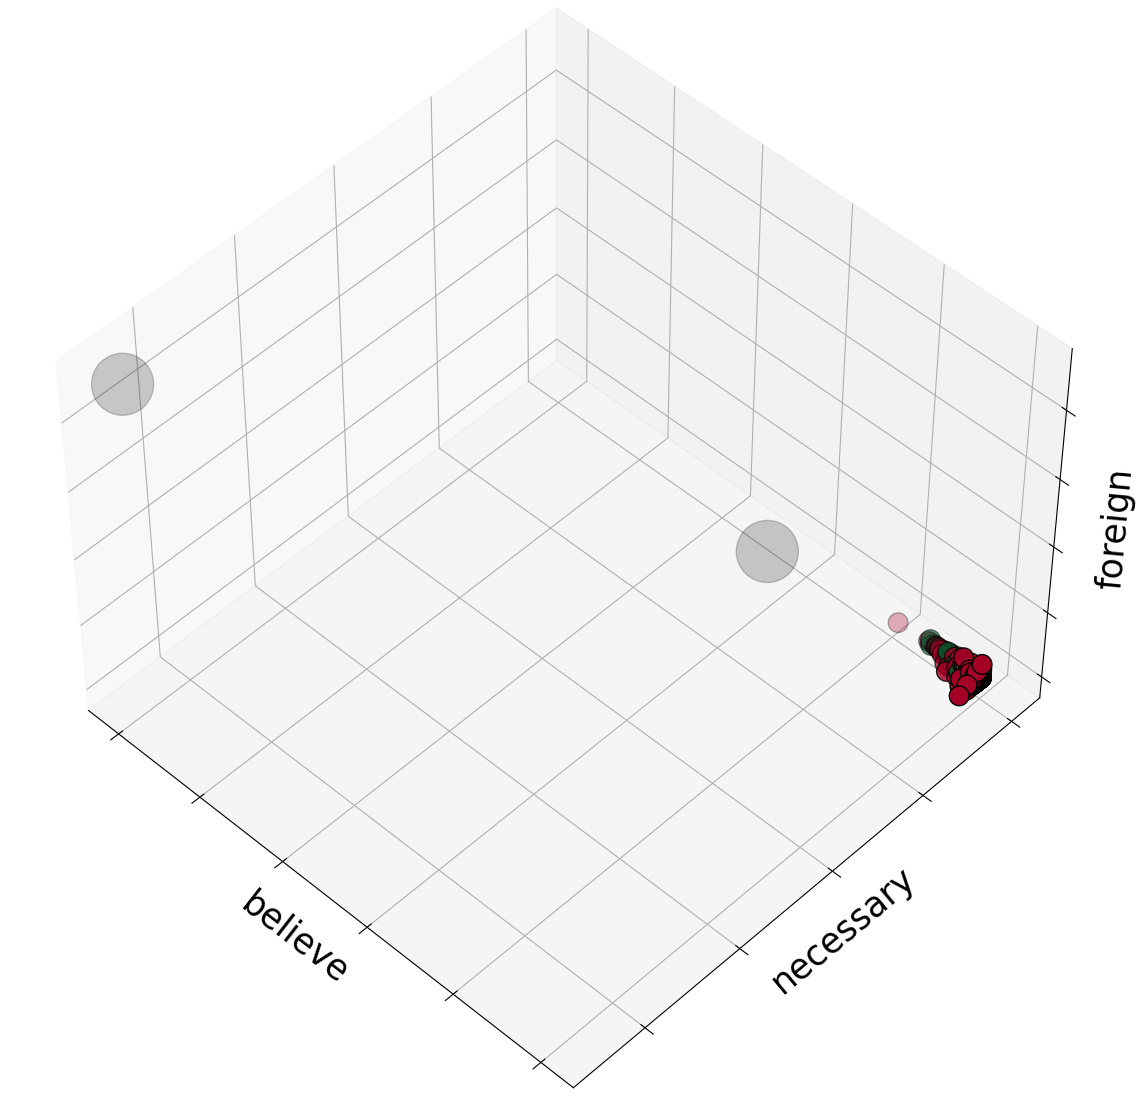

In [30]:
x=DF_TF["believe"]  ## col 1  starting from 0
y=DF_TF["necessary"]    ## col 14  starting from 0
z=DF_TF["foreign"]  ## col 2  starting from 0
colnames=DF_TF.columns
print(colnames)
#print(x,y,z)
fig1 = plt.figure(figsize=(12, 12))
ax1 = Axes3D(fig1, rect=[0, 0, .90, 1], elev=48, azim=134)

ax1.scatter(x,y,z, cmap="RdYlGn", edgecolor='k', s=200,c=prediction_kmeans)
ax1.w_xaxis.set_ticklabels([])
ax1.w_yaxis.set_ticklabels([])
ax1.w_zaxis.set_ticklabels([])

ax1.set_xlabel('believe', fontsize=25)
ax1.set_ylabel('necessary', fontsize=25)
ax1.set_zlabel('foreign', fontsize=25)
#plt.show()
        
centers = kmeans_object_Count.cluster_centers_
print(centers)
#print(centers)
C1=centers[0,(7,24,57)]
print(C1)
C2=centers[1,(7,24,57)]
print(C2)
xs=C1[0],C2[0]
print(xs)
ys=C1[1],C2[1]
zs=C1[2],C2[2]


ax1.scatter(xs,ys,zs, c='black', s=2000, alpha=0.2)
plt.show()

In [8]:
colnames

Index(['act', 'action', 'administration', 'america', 'american', 'americans',
       'applause', 'believe', 'best', 'better', 'business', 'citizens', 'come',
       'congress', 'constitution', 'countries', 'country', 'day', 'department',
       'don', 'duty', 'far', 'federal', 'force', 'foreign', 'free', 'freedom',
       'future', 'general', 'going', 'good', 'government', 'great', 'help',
       'history', 'hope', 'important', 'increase', 'interests', 'just', 'know',
       'law', 'laws', 'legislation', 'let', 'life', 'like', 'long', 'make',
       'man', 'means', 'men', 'military', 'mr', 'nation', 'national',
       'nations', 'necessary', 'need', 'new', 'order', 'peace', 'people',
       'place', 'policy', 'power', 'present', 'progress', 'public', 'purpose',
       'question', 'right', 'rights', 'sa', 'say', 'secretary', 'security',
       'service', 'shall', 'state', 'states', 'subject', 'support', 'thank',
       'think', 'time', 'today', 'trade', 'treaty', 'union', 'united', 'use

In [9]:
len(colnames)

100

In [10]:
colnames[77]

'service'

[[0.40232181 0.0827009 ]
 [0.64630754 0.25126377]
 [0.97958401 0.02071038]
 [0.27418036 0.76042582]
 [0.90640404 0.24432789]
 [0.18432418 0.58853812]
 [0.49431496 0.77753751]
 [0.37189779 0.80176321]
 [0.37864347 0.64648139]
 [0.77840466 0.20731134]
 [0.10009698 0.62718769]
 [0.85226491 0.64570714]
 [0.88333145 0.18504977]
 [0.80791869 0.3604446 ]
 [0.0187193  0.38224228]
 [0.64765157 0.06578053]
 [0.24653219 0.78942368]
 [0.53185085 0.75583444]
 [0.36893061 0.34717406]
 [0.1831354  0.50791195]
 [0.88005825 0.90737642]
 [0.12805777 0.92483766]
 [0.32875963 0.07271147]
 [0.91127768 0.80610056]
 [0.00950832 0.37114111]
 [0.29742739 0.86085171]
 [0.63635153 0.91068995]
 [0.71021895 0.17390075]
 [0.48805397 0.45683694]
 [0.15985429 0.72225962]
 [0.70209266 0.84863607]
 [0.39313184 0.34619352]
 [0.75244642 0.07030512]
 [0.7917515  0.41446807]
 [0.96108794 0.84272443]
 [0.58371032 0.34565255]
 [0.47019859 0.17563706]
 [0.61576786 0.79756241]
 [0.42740857 0.13747765]
 [0.25751398 0.08324483]


/Users/Max/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[0 0 0 3 0 3 3 3 3 0 3 3 0 0 0 0 3 3 0 3 3 3 0 3 0 3 3 0 0 3 3 0 0 0 3 0 0
 3 0 0 0 3 3 0 3 3 0 0 3 3 3 3 3 0 0 3 3 0 0 3 3 3 0 0 3 3 3 3 0 3 3 0 3 0
 0 3 0 0 3 3 0 0 3 3 0 3 0 3 3 0 0 3 3 0 0 0 3 0 3 3 4 1 1 2 1 2 1 4 4 1 4
 1 1 1 1 1 4 4 4 4 4 4 4 1 2 2 4 2 2 1 1 2 1 4 4 4 1 4 4 4 4 2 4 2 1 4 4 4
 2 4 1 4 2 1 2 2 4 4 4 4 1 4 1 1 1 4 4 2 1 1 4 4 4 4 4 1 1 2 2 2 2 2 2 1 2
 4 4 4 1 2 1 2 1 2 2 4 1 2 4 4]
Silhouette Score for k=2
 0.3989939691820598


/Users/Max/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Silhouette Score for k=3
 0.6059789900568969


/Users/Max/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Silhouette Score for k=4
 0.38573393073054474
[[-6.92324165e+00 -1.06695320e+01]
 [-8.63062033e+00 -7.13940564e+00]
 [-9.63048069e+00 -2.72044935e+00]
 [-2.30647659e+00  5.30797676e+00]
 [-7.57005366e+00 -3.01446491e+00]
 [-1.00051011e+00  2.77905153e+00]
 [-4.81826839e+00 -2.77214822e+00]
 [-5.33964799e+00 -1.27625764e+00]
 [-7.94308840e+00 -3.89993901e+00]
 [-5.54924525e+00 -3.41298968e+00]
 [-5.14508990e+00 -9.54492198e+00]
 [-7.09669936e+00 -8.04074036e+00]
 [-5.82641512e+00 -1.96346196e+00]
 [-1.83198811e+00  3.52863145e+00]
 [-7.34267235e+00 -3.16546482e+00]
 [-7.34072825e+00 -6.92427252e+00]
 [-7.94653906e+00 -3.36768655e+00]
 [-8.24598536e+00 -8.61315821e+00]
 [-1.98197711e+00  4.02243551e+00]
 [-4.35098035e+00 -3.69476678e+00]
 [-1.04768696e+01 -3.60318139e+00]
 [-1.10195984e+01 -3.15882031e+00]
 [-5.17255904e+00 -4.31835971e+00]
 [-2.40671820e+00  6.09894447e+00]
 [-6.72149498e+00 -2.88440806e+00]
 [-6.58935963e+00 -4.43379548e+00]
 [-1.46126019e+00  4.52549851e+00]
 [-9.1900

/Users/Max/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7049787496083261
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


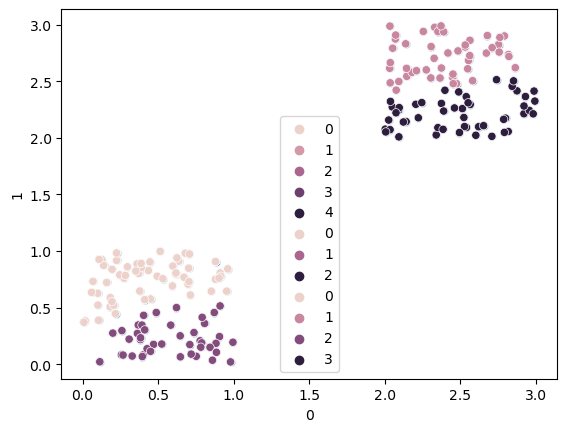

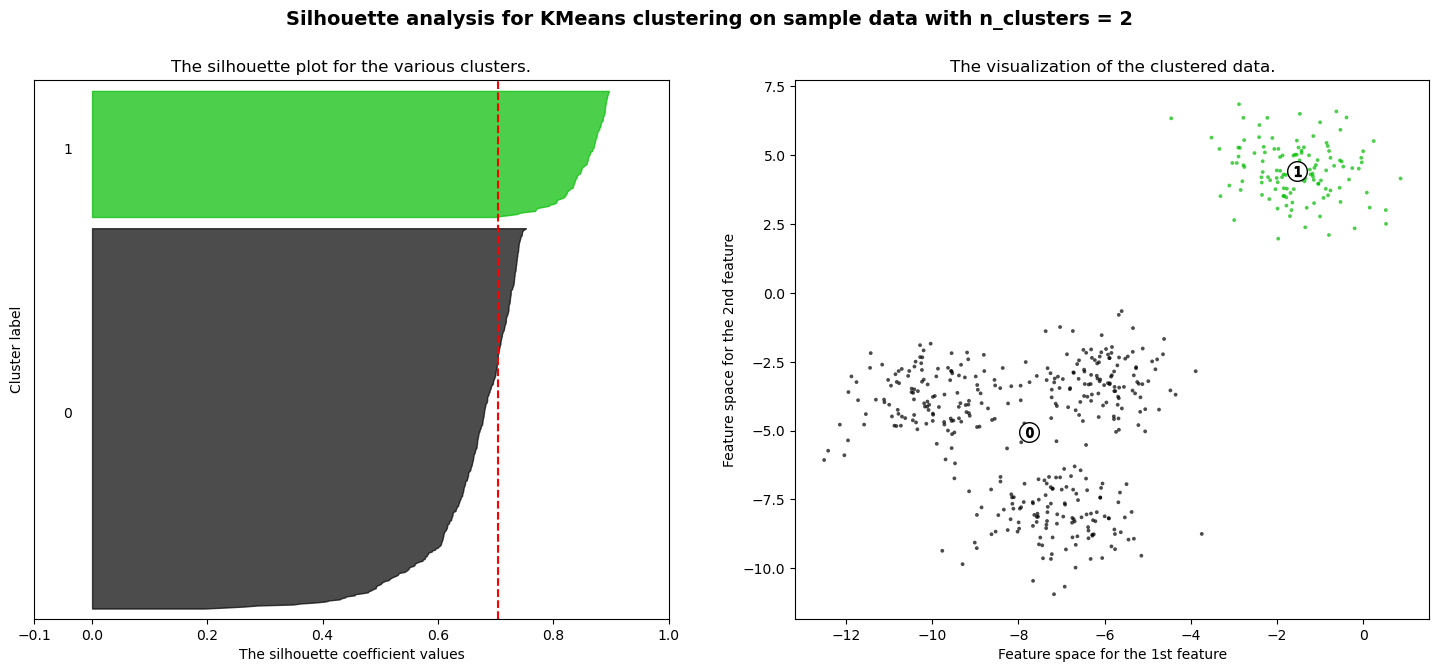

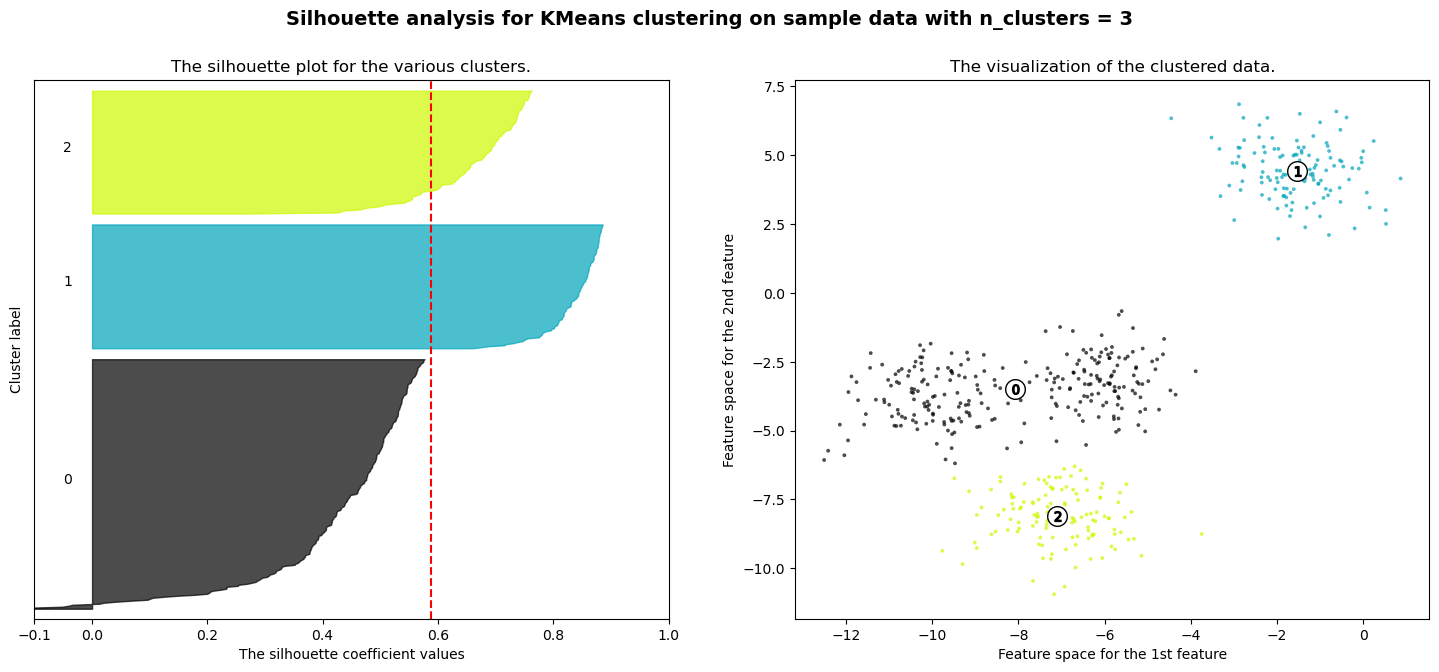

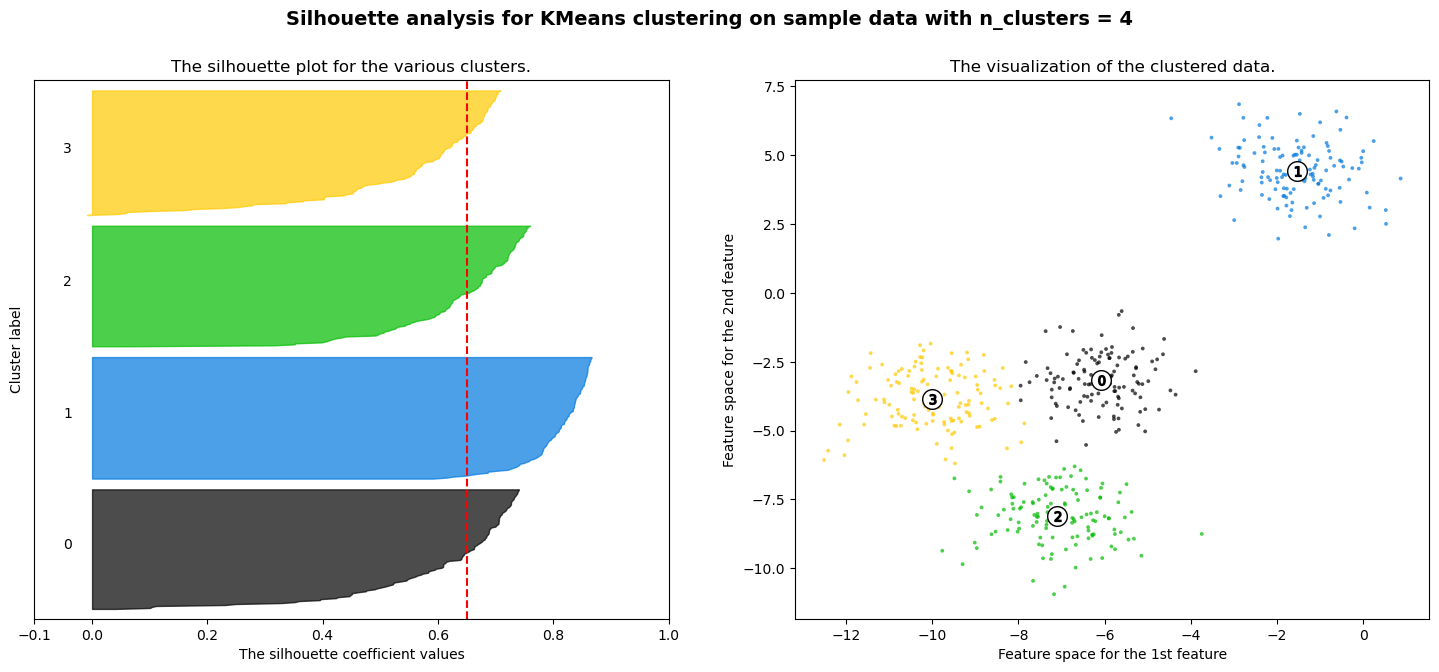

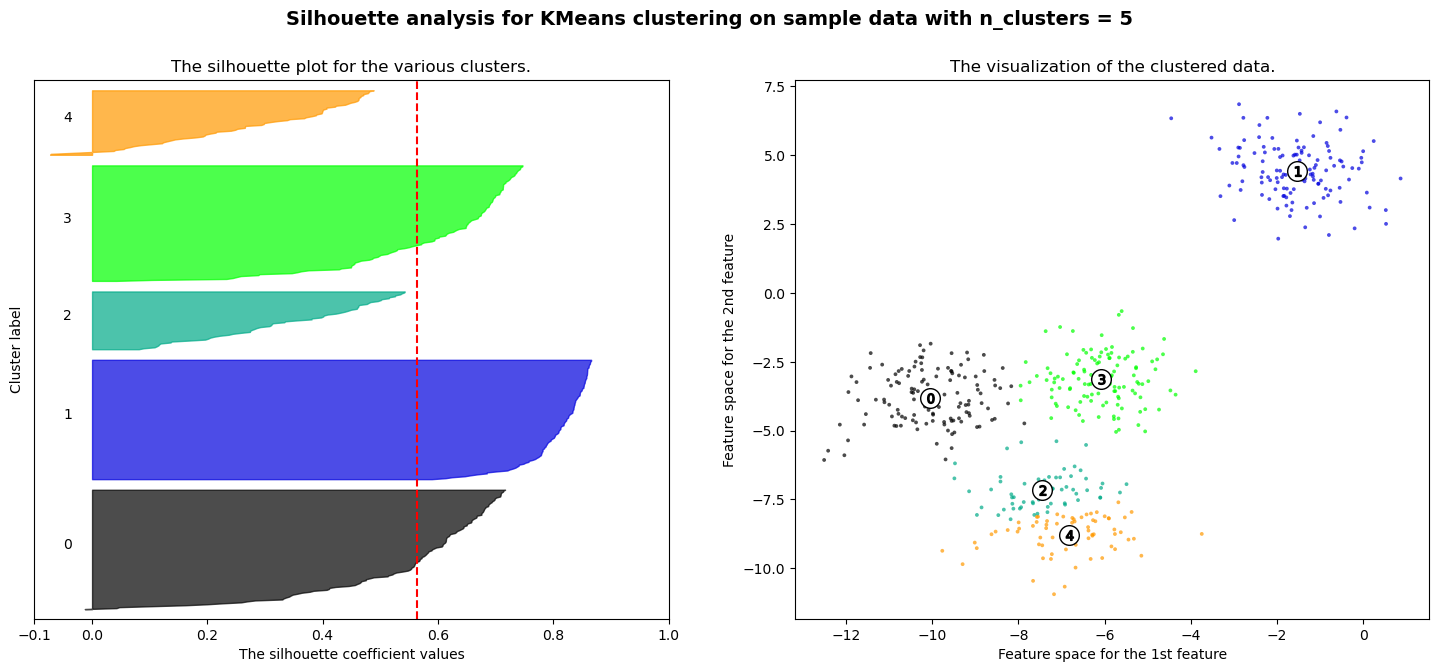

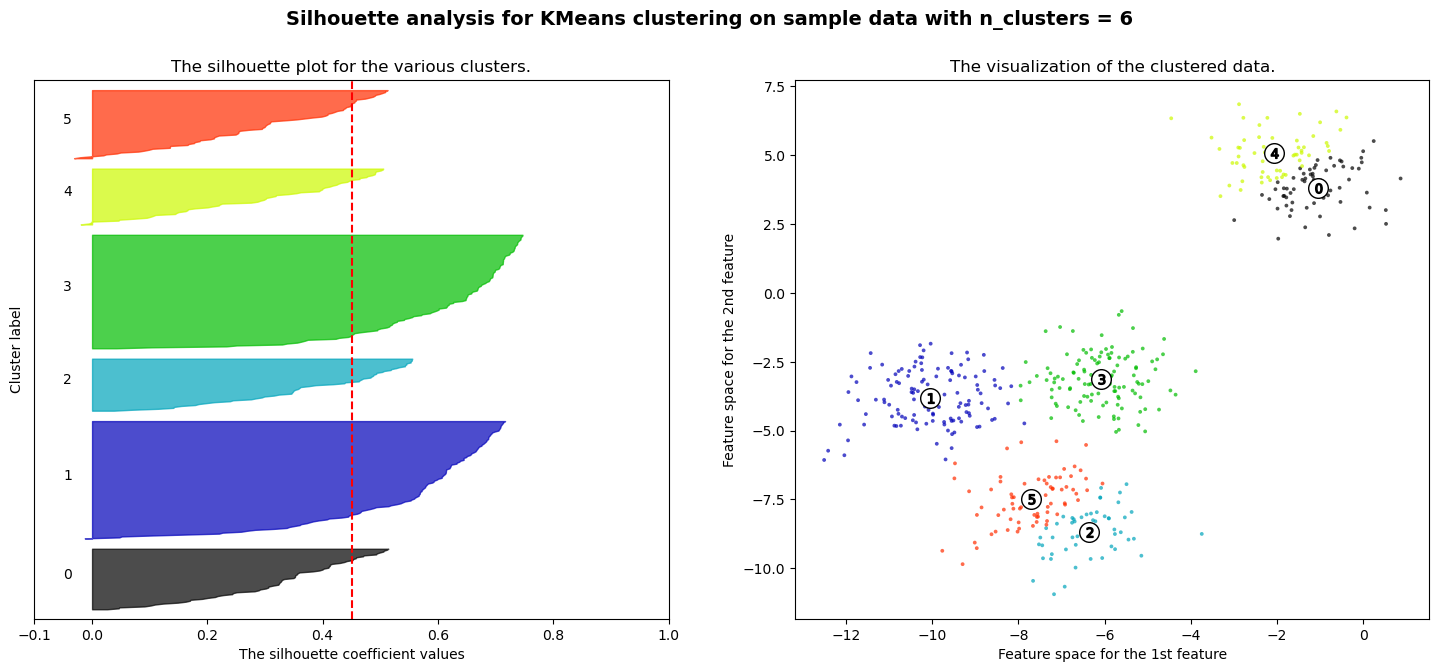

In [11]:
###############################################
##
##   Silhouette and Elbow - Optimal Clusters...
##
#############################################
from sklearn.metrics import silhouette_samples, silhouette_score

#import pandas as pd
#import numpy as np
import seaborn as sns
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
    
## The Silhouette Method helps to determine the optimal number of clusters
    ## in kmeans clustering...
    
    #Silhouette Coefficient = (x-y)/ max(x,y)

    #where, y is the mean intra cluster distance - the mean distance 
    ## to the other instances in the same cluster. 
    ## x depicts mean nearest cluster distance i.e. the mean distance 
    ## to the instances of the next closest cluster.
    ## The coefficient varies between -1 and 1. 
    ## A value close to 1 implies that the instance is close to its 
    ## cluster is a part of the right cluster. 
    ## Whereas, a value close to -1 means that the value is 
    ## assigned to the wrong cluster.

#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
# The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    
##
    ## This example is generated from a random mixture of normal data...
    ## ref:https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c
X= np.random.rand(100,2)
print(X)
Y= 2 + np.random.rand(100,2)
Z= np.concatenate((X,Y))
Z=pd.DataFrame(Z) 
print(Z.head())

sns.scatterplot(Z[0],Z[1])

KMean= KMeans(n_clusters=5)
KMean.fit(Z)
label=KMean.predict(Z)
print(label)

sns.scatterplot(Z[0],Z[1], hue=label)
print("Silhouette Score for k=2\n",silhouette_score(Z, label))


## Now - for k = 3
KMean= KMeans(n_clusters=3)
KMean.fit(Z)
label=KMean.predict(Z)
print("Silhouette Score for k=3\n",silhouette_score(Z, label))
sns.scatterplot(Z[0],Z[1],hue=label)

## Now - for k = 4
KMean= KMeans(n_clusters=4)
KMean.fit(Z)
label=KMean.predict(Z)
print("Silhouette Score for k=4\n",silhouette_score(Z, label))
sns.scatterplot(Z[0],Z[1],hue=label)

###############################
## Silhouette Example from sklearn
###################################################
from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_samples, silhouette_score

#import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import numpy as np


X, y = make_blobs(n_samples=500,
                  n_features=2, ## so it is 2D
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

print(X)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


## References:
#https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Hierarchical_Clustering-Dendrograms.pdf

###### Overview of distances reference....
#'minkowski', 'cityblock', 'cosine', 'correlation',
# 'hamming', 'jaccard', 'chebyshev', 'canberra', 
## 'mahalanobis', VI=None...
## RE: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist

# © 2023 Gates Bolton Analytics | Theme by Theme Ansar